In [15]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import subprocess
import yaml  

path_to_yaml = "/Users/boris/Work/CLASS-SZ/SO-SZ/cnc/mcmcs/cobaya/input_files/cobaya_cnc_spt_unbinned_WLYxmasscal_classy_sz_evaluate_as"
path_to_output = "/Users/boris/Work/CLASS-SZ/SO-SZ/cnc/mcmcs/cobaya/chains/cnc_unbinned_cluster_counts_spt_unbinned_WLYxmasscal_evaluate_5sept23_as.1.txt"

Dict_yaml = yaml.safe_load(open(path_to_yaml+".yaml"))


param_to_vary = "A_s"
p_min = 1.8e-9
p_max = 2.8e-9
p_ar = np.linspace(p_min,p_max,2)

# param_to_vary = "corr_xi_WL"
# p_min = -0.5
# p_max = 0.5
# p_ar = np.linspace(p_min,p_max,2)

mlnp_ar = []
ntot_ar = []
ntotfields_ar = []
for p in p_ar: 

    Dict_yaml['sampler']['evaluate']['override'][param_to_vary] = float(p)
    path_to_yaml_tmp = path_to_yaml+'_tmp.yaml'
    with open(path_to_yaml_tmp,'w') as outfile:
        yaml.dump(Dict_yaml, outfile, default_flow_style=False)


    str_cmd_subprocess = ["cobaya-run",
                          path_to_yaml_tmp,
                          "-f"]

    code_output = subprocess.run(str_cmd_subprocess,
                                 capture_output=True, 
                                 text=True)
    r = np.loadtxt(path_to_output)
    mlnp = r[::-1][0]/2.
    mlnp_ar.append(mlnp)
    ntotfields = []
    for line in code_output.stdout.split('\n'):
        if 'Ntot =' in line:
            ntot = float(line.split('=')[1])
            ntot_ar.append(ntot)
        for i in range(19): # there are 19 spt fields
            if 'Ntotalfields %d='%i in line:
                ntotfields.append(float(line.split('=')[1]))
    ntotfields_ar.append(ntotfields)
mlnp_ar = np.asarray(mlnp_ar)
ntot_ar = np.asarray(ntot_ar)



In [6]:
for line in code_output.stdout.split('\n'):
    print(line)

[output] Output to be read-from/written-into folder '/Users/boris/Work/CLASS-SZ/SO-SZ/cnc/mcmcs/cobaya/chains', with prefix 'cnc_unbinned_cluster_counts_spt_unbinned_WLYxmasscal_evaluate_5sept23_as'
[output] Found existing info files with the requested output prefix: '/Users/boris/Work/CLASS-SZ/SO-SZ/cnc/mcmcs/cobaya/chains/cnc_unbinned_cluster_counts_spt_unbinned_WLYxmasscal_evaluate_5sept23_as'
[output] Will delete previous products ('force' was requested).
[absl] *WARNING* At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.
[absl] *WARNING* At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.
[prior] *WARNING* External prior 'Ob0h2_prior' loaded. Mind that it might not be normalized!
[prior] *WARNING* External prior 'dlnMg_dlnr_

In [16]:
ntot_ar

array([ 65.96340414, 876.64272076])

In [126]:
ntotfields_ar

[[9.4407,
  12.5171,
  15.9253,
  22.3471,
  14.8892,
  16.1076,
  12.8695,
  14.1542,
  12.9188,
  7.5951,
  7.2134,
  15.4262,
  6.252,
  9.3876,
  9.8996,
  6.8243,
  18.4644,
  8.9031,
  6.1569],
 [9.4407,
  12.5171,
  15.9253,
  22.3471,
  14.8892,
  16.1076,
  12.8695,
  14.1542,
  12.9188,
  7.5951,
  7.2134,
  15.4262,
  6.252,
  9.3876,
  9.8996,
  6.8243,
  18.4644,
  8.9031,
  6.1569]]

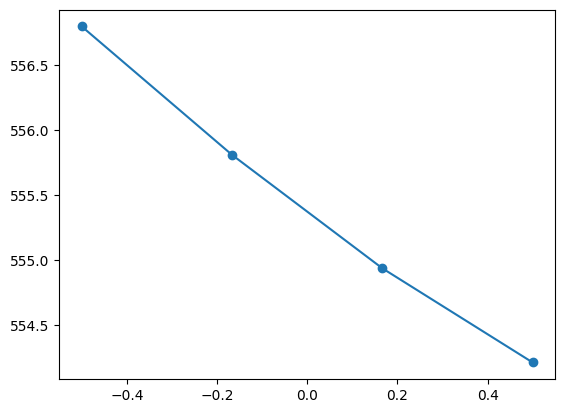

In [64]:
plt.plot(p_ar,mlnp_ar,marker='o')

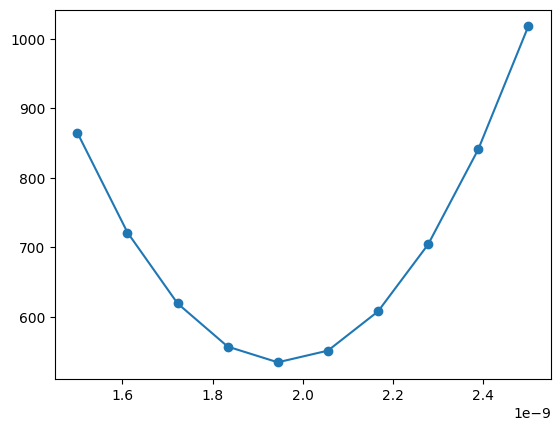

In [ ]:
plt.plot(p_ar,mlnp_ar,marker='o')

In [17]:
mlnp_ar

array([278.180805, 129.90575 ])

In [18]:
np.savetxt('/Users/boris/Work/CLASS-SZ/SO-SZ/cnc/mcmcs/cobaya/chains/cnc1d'+param_to_vary+'.txt',np.c_[p_ar,mlnp_ar])